In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import datetime
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score
% matplotlib inline
plt.style.use('ggplot')

In [2]:
df_customer = pd.read_csv('data/customer.csv')

In [3]:
df_receipts = pd.read_csv('data/receipts.csv')

In [4]:
df_returns = pd.read_csv('data/returns.csv')

In [5]:
df_sessionsummary = pd.read_csv('data/sessionsummary.csv')

/Users/alessandra/anaconda/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (9,10) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [6]:
df_customer['Age'] = 2017-df_customer['yearOfBirth']

In [7]:
df_customer['subscription_date'] = pd.to_datetime(df_customer['dateCreated']).dt.date

# Adding features from other data sources

In [8]:
df_receipts.head()

,customerId2,productId,divisionId,sourceId,itemQty,signalDate,receiptId,price
0,227315,2277402,7,3,1,2012-06-28T13:09:10.337000000,51619424,7.5
1,1328821,2260010,5,3,1,2012-06-28T17:36:43.693000000,51635547,25.0
2,848100,2249274,7,3,1,2012-06-28T13:10:22.640000000,51619495,22.0
3,1795973,2281386,7,3,1,2012-06-28T21:10:49.290000000,51647551,14.5
4,227315,2315210,7,3,1,2012-06-28T13:09:10.337000000,51619424,3.5


In [9]:
df_receipts.shape

(315177, 8)

In [10]:
df_receipts.customerId2.nunique()

84082

In [11]:
df_returns.customerId2.nunique()

155746

In [12]:
df_returns.returnAction.unique()

array(['Cancel', 'Refund', 'Replacement', 'Reject'], dtype=object)

In [13]:
df_sessionsummary['date'] = pd.to_datetime(df_sessionsummary.startTime).dt.date

In [14]:
df_sessionsummary=df_sessionsummary.sort_values(by='date')

In [15]:
idxrec = df_receipts.groupby('customerId2').price.sum()
df_customer.loc[df_customer.customerId2.isin(idxrec.keys()), 'total_revenue'] = idxrec.values

idxrec = df_receipts.groupby('customerId2').customerId2.count()
df_customer.loc[df_customer.customerId2.isin(idxrec.keys()), 'n_purchases'] = idxrec.values
idxrec = df_returns.groupby('customerId2').customerId2.count()
df_customer.loc[df_customer.customerId2.isin(idxrec.keys()), 'n_returns'] = idxrec.values
idxrec = df_sessionsummary.groupby('customerId2').customerId2.count()
df_customer.loc[df_customer.customerId2.isin(idxrec.keys()), 'n_actions'] = idxrec.values
idxrec = df_returns[df_returns.returnAction=='Cancel'].groupby('customerId2').customerId2.count()
df_customer.loc[df_customer.customerId2.isin(idxrec.keys()), 'n_cancel'] = idxrec.values
idxrec = df_returns[df_returns.returnAction=='Refund'].groupby('customerId2').customerId2.count()
df_customer.loc[df_customer.customerId2.isin(idxrec.keys()), 'n_refund'] = idxrec.values

idxrec = df_returns[df_returns.returnAction=='Replacement'].groupby('customerId2').customerId2.count()
df_customer.loc[df_customer.customerId2.isin(idxrec.keys()), 'n_replacement'] = idxrec.values

idxrec = df_returns[df_returns.returnAction=='Reject'].groupby('customerId2').customerId2.count()
df_customer.loc[df_customer.customerId2.isin(idxrec.keys()), 'n_reject'] = idxrec.values

idxrec = df_sessionsummary.groupby('customerId2').pageViewCount.sum()
df_customer.loc[df_customer.customerId2.isin(idxrec.keys()), 'pageviews'] = idxrec.values

idxrec = df_returns[df_returns.returnAction==1].groupby('customerId2').customerId2.count()
df_customer.loc[df_customer.customerId2.isin(idxrec.keys()), 'full_price'] = idxrec.values
idxrec = df_returns[df_returns.returnAction==2].groupby('customerId2').customerId2.count()
df_customer.loc[df_customer.customerId2.isin(idxrec.keys()), 'discount'] = idxrec.values

idxrec = df_returns[df_returns.returnAction==3].groupby('customerId2').customerId2.count()
df_customer.loc[df_customer.customerId2.isin(idxrec.keys()), 'sales'] = idxrec.values

idxrec = df_returns[df_returns.returnAction==4].groupby('customerId2').customerId2.count()
df_customer.loc[df_customer.customerId2.isin(idxrec.keys()), 'other'] = idxrec.values

idxrec = df_returns[df_returns.returnAction==10].groupby('customerId2').customerId2.count()
df_customer.loc[df_customer.customerId2.isin(idxrec.keys()), 'return'] = idxrec.values

In [16]:
idxrec = df_sessionsummary.groupby('customerId2').date.max()-df_sessionsummary.groupby('customerId2').date.min()


In [17]:
df_customer.loc[df_customer.customerId2.isin(idxrec.keys()), 'avg_frequency'] = idxrec.apply(lambda x: x.days)

In [18]:
df_customer['avg_frequency'] = df_customer['avg_frequency']/df_customer['n_actions']

In [19]:
df_customer.avg_frequency.fillna(2000, inplace=True)
df_customer.replace(np.inf, 2000, inplace=True)

In [21]:
big = df_customer.groupby('shippingCountry').customerId2.count()

In [22]:
print(df_customer.shape)

df_customer_big = df_customer[(df_customer.Age>=15) & (df_customer.Age<80)]
df_customer_big = df_customer_big[df_customer_big.shippingCountry.isin(big[big>2000].keys())]
print(df_customer_big.shape)


print((1-len(df_customer_big)/float(len(df_customer)))*100)


(470169, 24)
(431879, 24)
8.14388017925


In [23]:
df_customer_big.columns

Index([u'customerId2', u'churnlabel', u'gender', u'shippingCountry',
       u'dateCreated', u'yearOfBirth', u'premier', u'Age',
       u'subscription_date', u'total_revenue', u'n_purchases', u'n_returns',
       u'n_actions', u'n_cancel', u'n_refund', u'n_replacement', u'n_reject',
       u'pageviews', u'full_price', u'discount', u'sales', u'other', u'return',
       u'avg_frequency'],
      dtype='object')

In [24]:
df_features = df_customer_big.copy()

df_features['avg_price'] = df_features['total_revenue']/df_features['n_purchases']
df_features.replace(np.inf, 0, inplace=True)
df_features.fillna(0, inplace=True)

In [25]:
df_features.loc[df_features.gender=='F', 'gender'] = 0
df_features.loc[df_features.gender=='M', 'gender'] = 1

df_features.drop('yearOfBirth', axis=1, inplace=True)

df_features.drop('dateCreated', axis=1, inplace=True)

#df_features['n_days'] = (datetime.date.today()-df_features['subscription_date']).dt.days

#df_features.n_days.max()

#df_features=df_features[df_features.n_days<10000]

df_features.drop('subscription_date', axis=1, inplace=True)
df_features.drop('customerId2', axis=1, inplace=True)

countrydum = pd.get_dummies(df_features['shippingCountry'])
df_features = pd.concat([df_features, countrydum],axis=1)

df_features.drop('shippingCountry', axis=1, inplace=True)

premierdum = pd.get_dummies(df_features.premier)

df_features = pd.concat([df_features, premierdum],axis=1)

df_features.drop('premier', axis=1, inplace=True)

In [27]:
idx = np.random.permutation(df_customer_big.shape[0])

In [28]:
Y = np.array(df_features['churnlabel'])
X = np.array(df_features.drop('churnlabel', axis=1))#/df_features.drop('churnlabel', axis=1).max())

#idx = np.random.permutation(X.shape[0])

ntrain = int(2*len(idx)/3)
xtrain = X[idx[:ntrain], :]
ytrain = Y[idx[:ntrain]]
xtest = X[idx[ntrain:], :]
ytest = Y[idx[ntrain:]]

# Model #1: Random Forest 

In [29]:
clf = RandomForestClassifier()

clf.fit(xtrain, ytrain)

pred = clf.predict(xtest)

In [30]:
confusion_matrix(ytest, pred)

array([[46421, 29344],
       [27000, 41195]])

In [31]:
1-sum(np.abs(ytest-pred))/float(len(pred))

0.60861350375104195

In [32]:
precision_score(ytest, pred)

0.6322578009016494

In [33]:
recall_score(ytest, pred)

0.6126971556787435

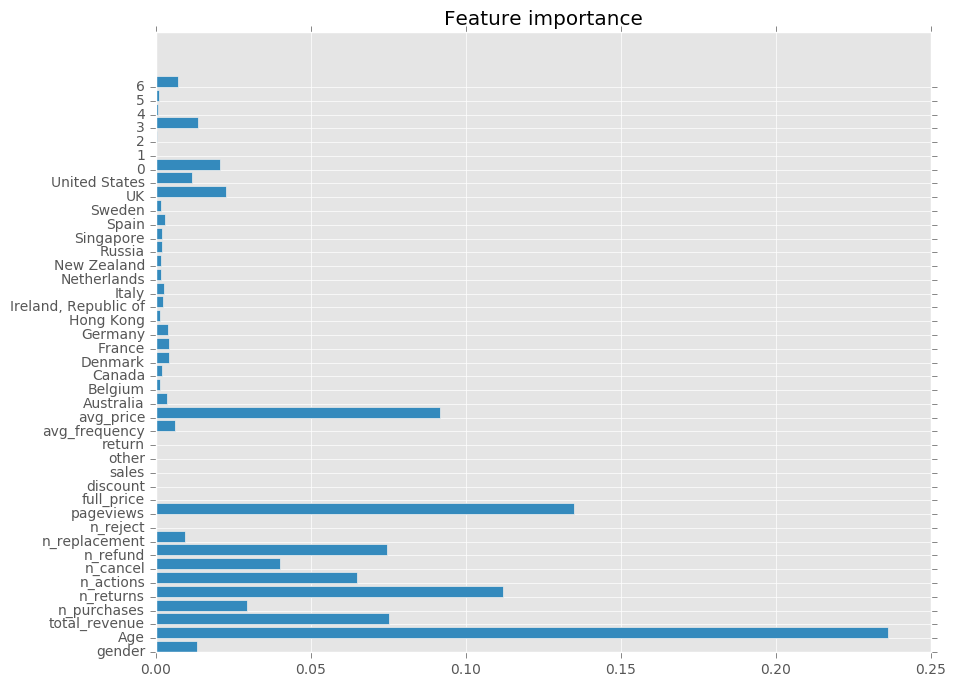

In [34]:
fig, ax = plt.subplots(figsize=(10, 8))
ax.barh(range(len(clf.feature_importances_)), clf.feature_importances_)
ax.set_yticks(range(len(df_features.columns[1:])))
ax.set_yticklabels(df_features.columns[1:])
ax.set_title('Feature importance')

# Model #2: Logistic Regression 

In [35]:
from sklearn.linear_model import LogisticRegression

In [36]:
clf = LogisticRegression()

In [37]:
clf.fit(xtrain, ytrain)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [38]:
pred = clf.predict(xtest)

In [39]:
1-sum(np.abs(ytest-pred))/float(len(pred))

0.61235065295915536

In [40]:
precision_score(ytest, pred)

0.63136970973474627

In [41]:
recall_score(ytest, pred)

0.6330363624364812

In [42]:
from sklearn.ensemble import GradientBoostingClassifier

In [43]:
clf = GradientBoostingClassifier()

In [44]:
clf.fit(xtrain, ytrain)

GradientBoostingClassifier(init=None, learning_rate=0.1, loss='deviance',
              max_depth=3, max_features=None, max_leaf_nodes=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False)

In [45]:
pred = clf.predict(xtest)

In [46]:
1-sum(np.abs(ytest-pred))/float(len(pred))

0.63043901083634335

In [47]:
precision_score(ytest, pred)

0.64742626399905912

In [48]:
recall_score(ytest, pred)

0.65390351745528941

In [49]:
df_customer_big[df_customer_big.churnlabel==2].total_revenue.sum()*.63-df_customer_big[df_customer_big.churnlabel==2].total_revenue.sum()*.50

288576.35299999965

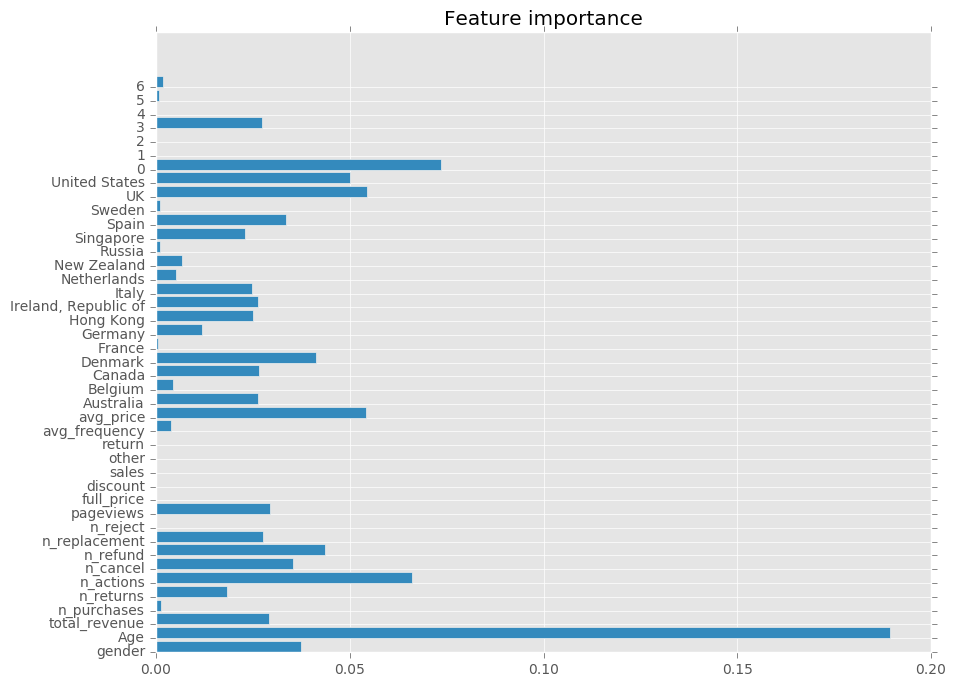

In [50]:
fig, ax = plt.subplots(figsize=(10, 8))
ax.barh(range(len(clf.feature_importances_)), clf.feature_importances_)
ax.set_yticks(range(len(df_features.columns[1:])))
ax.set_yticklabels(df_features.columns[1:])
ax.set_title('Feature importance')

# Quantitative insights

In [184]:
df_churn = df_customer_big[df_customer_big.churnlabel==2]
df_nochurn = df_customer_big[df_customer_big.churnlabel==1]

In [185]:
df_churn.shape

(204707, 24)

In [186]:
df_nochurn.shape

(227172, 24)

In [187]:
df_sessionsummary.columns

Index([u'customerId2', u'country', u'startTime', u'site', u'pageViewCount',
       u'nonPageViewEventsCount', u'userAgent', u'screenResolution',
       u'browserSize', u'productViewCount', u'productViewsDistinctCount',
       u'productsAddedToBagCount',
       u'productsSavedForLaterFromProductPageCount',
       u'productsSavedForLaterFromCategoryPageCount',
       u'productsPurchasedDistinctCount', u'productsPurchasedTotalCount',
       u'date'],
      dtype='object')

In [205]:
df_churn.columns

Index([u'customerId2', u'churnlabel', u'gender', u'shippingCountry',
       u'dateCreated', u'yearOfBirth', u'premier', u'Age',
       u'subscription_date', u'total_revenue', u'n_purchases', u'n_returns',
       u'n_actions', u'n_cancel', u'n_refund', u'n_replacement', u'n_reject',
       u'pageviews', u'full_price', u'discount', u'sales', u'other', u'return',
       u'avg_frequency'],
      dtype='object')

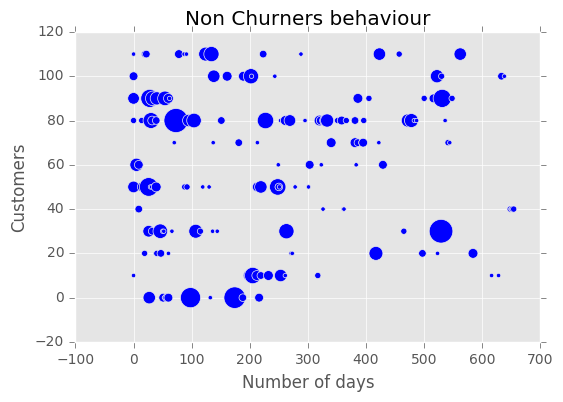

In [244]:
k=0
for c in df_nochurn.customerId2.unique():
    actions = df_sessionsummary[df_sessionsummary.customerId2==c]
    if(len(actions)<20):
        continue
    start = actions.date.min()
    #print()
    time_range = np.zeros((actions.date.max()-actions.date.min()).days+1)
    n_purchases = np.zeros((actions.date.max()-actions.date.min()).days+1)
    for a in range(len(actions)):
        #print((actions.iloc[a].date-start).days)
        #print(time_range)
        time_range[(actions.iloc[a].date-start).days] = k
        n_purchases[(actions.iloc[a].date-start).days] = actions.iloc[a].productViewCount
    plt.scatter(range(len(time_range)), time_range, s=n_purchases*10)
    plt.title('Non Churners behaviour')
    plt.xlabel('Number of days')
    plt.ylabel('Customers')
    if k>100:
        break
    k+=10

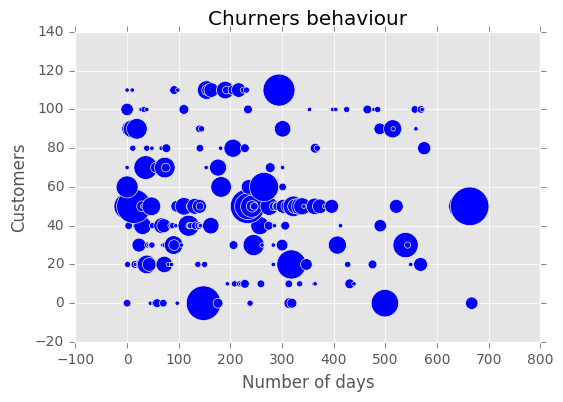

In [245]:
k=0
for c in df_churn.customerId2.unique():
    actions = df_sessionsummary[df_sessionsummary.customerId2==c]
    if(len(actions)<20):
        continue
    start = actions.date.min()
    #print()
    time_range = np.zeros((actions.date.max()-actions.date.min()).days+1)
    n_purchases = np.zeros((actions.date.max()-actions.date.min()).days+1)
    for a in range(len(actions)):
        #print((actions.iloc[a].date-start).days)
        #print(time_range)
        time_range[(actions.iloc[a].date-start).days] = k
        n_purchases[(actions.iloc[a].date-start).days] = actions.iloc[a].productViewCount


    plt.scatter(range(len(time_range)), time_range, s=n_purchases*10)
    #plt.scatter(range(len(time_range)), time_range, s=n_purchases)
    plt.title('Churners behaviour')
    plt.xlabel('Number of days')
    plt.ylabel('Customers')
    if k>100:
        break
    k+=10

In [374]:
df_returns['date']=pd.to_datetime(df_returns['signalDate']).dt.date

In [376]:
df_returns.head()

,customerId2,productId,divisionId,sourceId,itemQty,signalDate,receiptId,returnId,returnAction,returnReason,date
0,1095144,2128520,7,10,1,2013-02-11 11:47:31.903000000,67532007,21031213,Cancel,Manual Cancel,2013-02-11
1,490428,2141233,5,10,1,2013-01-13 03:30:35.723000000,65396949,20319770,Cancel,Manual Cancel,2013-01-13
2,490428,2141233,5,10,1,2013-01-13 04:08:53.117000000,65399842,20319835,Cancel,Manual Cancel,2013-01-13
3,1434605,2144889,5,10,1,2013-01-13 23:26:52.100000000,63559382,20338649,Refund,5. Doesn't Fit properly,2013-01-13
4,1474291,2144889,5,10,1,2013-01-12 09:37:17.997000000,64172089,20307061,Refund,5. Doesn't Fit properly,2013-01-12
